 
## Investigating customer buying patterns and Demographics for Blackwell Company.

In [27]:
# Importing required libraries.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np


In [56]:
#Formatting numbers in order to get only two decimals for easier reading
pd.options.display.float_format = '{:,.2f}'.format

In [57]:
import warnings
warnings.filterwarnings("ignore")

### Importing our dataset and understanding its configuration

In [58]:
data = pd.read_csv("Demographic_Data.csv") 

In [59]:
data.head() 

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,"1,525.70",4
3,1,46,3,715.25,3
4,1,33,4,"1,937.50",1


Function .head(): helps us to see the first N rows of our dataframe.  
In this case, we can already see that in row nuber 1 (index 0), there's a customer of 37 years old who has payed 281.03 for his specific transaction. This customer is located in region South, and bought a total of 4 items online 
 

In [60]:
 data.describe()

,in-store,age,items,amount,region
count,"80,000.00","80,000.00","80,000.00","80,000.00","80,000.00"
mean,0.50,45.76,4.50,835.92,2.67
std,0.50,15.72,2.06,721.27,1.13
min,0.00,18.00,1.00,5.00,1.00
25%,0.00,33.00,3.00,285.14,2.00
50%,0.50,45.00,4.00,582.32,3.00
75%,1.00,56.00,6.00,"1,233.70",4.00
max,1.00,85.00,8.00,"3,000.00",4.00


**Conclusions**:

- **in-store**: variable of type numeric, not ordinal or categoric. 1 for in-store and 0 for online sales
- **age**: numeric, not categoric. Our costumers range from 18 to the max 85 ,additionally, the average age is 45,75. There is a standart deviation of 15 
- **items**: variable of type chategorical, nominal not numeric, there is a minimum of the items bought of 1 ,there is no standart deviation also a mean.  
- **amount**: numerical, continuous variable... not categorical, there is a minimum of amount purchased of 5 and a max of 300,additionally, we have a std of 721 which means that the data are spreaded over as the value of std is high, and the average of the amount purchased is around 836. 
- **region**: categorical, nominal not ordianal or numeric, there is not a standart deviation, or a mean, therefore, the data are ot dispersed. 


Additionally, on average, of amount spent is around 836. The range shows a huge difference between the min value and the max as thr max value show 3000 shows the evidence of an outlier.

In [61]:
data.nunique()   #finding several unique values in each column and the data description

in-store        2
age            68
items           8
amount      56112
region          4
dtype: int64

In [62]:
data.isnull().sum() #getting the numbers of missing records in each column.  

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

 As we can see there is no missing records.

**Analyzing amount per region. As far as we know the variable amount is numerical so we are going to find the max, min, mean, etc for each region by using the function group by() groupby operation, which involves some combination of splitting the object, applying a function, and combining the results.** 
 
 
 We want to aggregate it by AMOUNT & REGION and count the number of rows. Currently I do the following:








In [63]:
 data.groupby('region')['amount'].count() #count for each region

region
1    16000
2    20000
3    18000
4    26000
Name: amount, dtype: int64

In [64]:
 data.groupby('region')['amount'].max() #max of amount for each region

region
1   1,999.80
2     499.94
3   3,000.00
4   3,000.00
Name: amount, dtype: float64

In [65]:
 data.groupby('region')['amount'].sum().round(1) #sum of amount for each region

region
1   11,922,583.90
2    5,042,183.90
3   16,523,453.50
4   33,385,352.30
Name: amount, dtype: float64

In [66]:
data.groupby('region')['amount'].mean()      #mean of amount for each region

region
1     745.16
2     252.11
3     917.97
4   1,284.05
Name: amount, dtype: float64

In [67]:
data.groupby('region')['amount'].nth(-1) #finding the last value for each region

region
1   335.32
2   414.16
3   527.12
4   698.54
Name: amount, dtype: float64

### Creating plots for checking out the data finding patterns and  understand its properties.  
We can even observe the relations between our variables. Based on our case we will analyse and concentrate in customer purchasing behavior.

In [68]:
### Creating a customized histogram with annotation in order to get information about the distribuiton of the data 

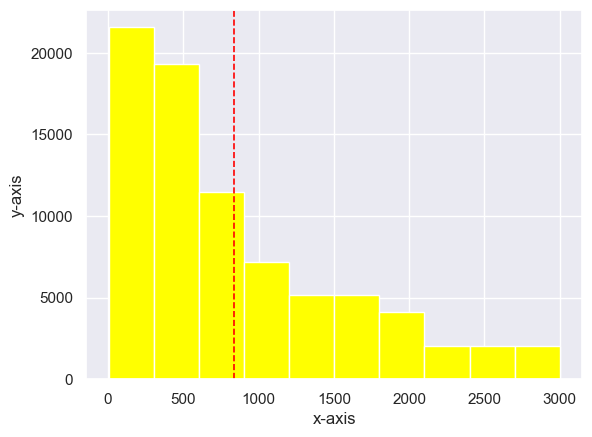

In [69]:
plt.hist(data['amount'], color= "yellow", alpha= 1, label= data) 
plt.axvline(data['amount'].mean(), color='red', linestyle='dashed', linewidth=1.2, label='Mean') #adding annotations(in our case mean)
plt.xlabel('x-axis') #adding labels
plt.ylabel('y-axis') 

plt.show()


##### In this histogram we can obtain some basic insights regarding the amount, as we can see from the vertical red line which displays the average amount (approximately 850)  but at the histogram below we can distinguish easier the frequency of the transcations. 

In [70]:
### Creating another histogram for the same variable to understand its density  using seaborn library.

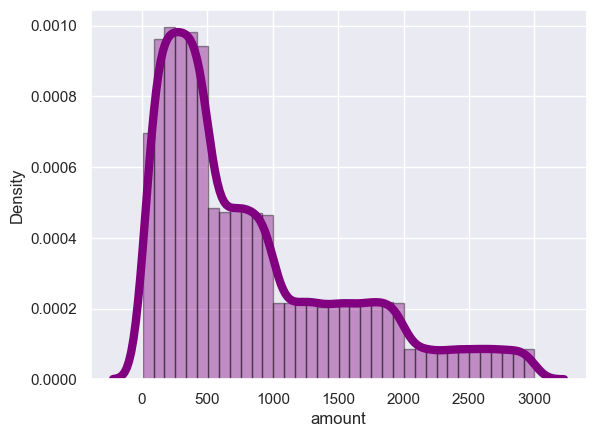

In [71]:
sns.distplot(data['amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 6});

In the visualisation above , through the seaborn library we have created a visualisation that is a combination of histogram and density plot, therefore, here we can make more accurate observations compared to histogram above, so the amount with the value of 200 has the highest density, then the line that describes our chart, tends to follow a downtrend,which means, bigger the amount, less the frequency of data.

### Analyzing relationships between the variables  
### First objective: Do customers in different regions spend more per transaction? Which regions spend the most/least? 

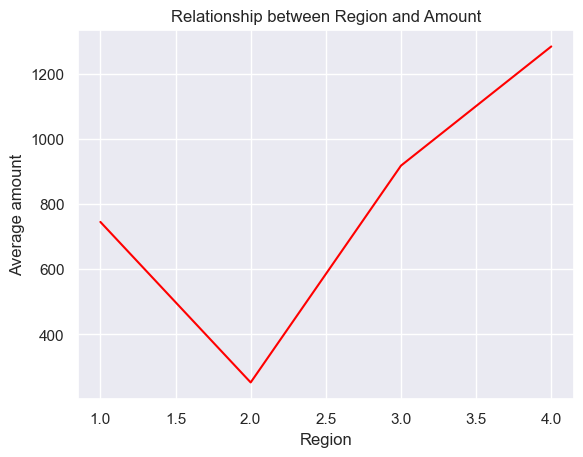

In [72]:
plt.plot(data.groupby(['region'])['amount'].mean(), color= "red")  
# naming the y axis
plt.xlabel('Region') 
# naming the y axis 
plt.ylabel('Average amount') 
# giving a title to my graph 
plt.title('Relationship between Region and Amount')  
ax = plt.gca() # Get the current Axes instance on the current figure 
# get command over the individual
# boundary line of the graph body
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
  
     

plt.show()
  

In the plot demonstrated above we can make some general observations, but not specific ones. As far as we can see,the region of West has surpassed the value of average transcations compared to others and the region of south has the lowest one, or we can say that the region of west spend more per transcation and the region of south spend least per transcation . 
#### We can arise a question: Why customers in different regions spend more per transaction?There are external factors such as the age of our costumers, but also the choice of buying items online or offline. Therefore, we can assume that the region of west spend more per transcation because in this region we have so many youngsters, probably we could say that the young ages tend to use online purchasing more efficently than the elderlies one. 

In [73]:
# Creating new columns with the specific amount for each of the regions, so that we can build a boxplot later

data['north'] = 0

for i in range(0, len(data)):
    if data['region'][i] == 1:
        data['north'][i] = data['amount'][i]
      
data['south'] = 0

for i in range(0, len(data)):
    if data['region'][i] == 2:
        data['south'][i] = data['amount'][i]
        
data['east'] = 0

for i in range(0, len(data)):
    if data['region'][i] == 3:
        data['east'][i] = data['amount'][i]
        
data['west'] = 0

for i in range(0, len(data)):
    if data['region'][i] == 4:
        data['west'][i] = data['amount'][i]
        
data

,in-store,age,items,amount,region,north,south,east,west
0,0,37,4,281.03,2,0.00,281.03,0.00,0.00
1,0,35,2,219.51,2,0.00,219.51,0.00,0.00
2,1,45,3,"1,525.70",4,0.00,0.00,0.00,"1,525.70"
3,1,46,3,715.25,3,0.00,0.00,715.25,0.00
4,1,33,4,"1,937.50",1,"1,937.50",0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,558.82,0.00,0.00,0.00
79996,0,59,7,"1,932.00",3,0.00,0.00,"1,932.00",0.00
79997,0,54,1,414.16,2,0.00,414.16,0.00,0.00
79998,1,49,4,335.32,1,335.32,0.00,0.00,0.00


In [74]:
data.groupby(['region'])[['north', 'south', 'east', 'west']].mean()

,north,south,east,west
region,,,,
1,745.16,0.00,0.00,0.00
2,0.00,252.11,0.00,0.00
3,0.00,0.00,917.97,0.00
4,0.00,0.00,0.00,"1,284.05"


<Axes: xlabel='region', ylabel='amount'>

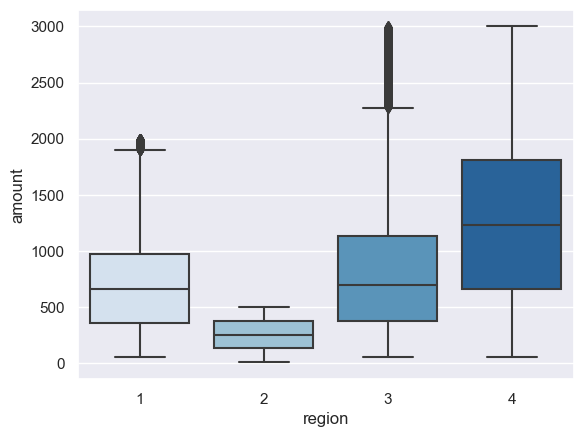

In [75]:
# set a grey background (use sns.set_theme())
sns.set(style="darkgrid")
sns.boxplot(data=data,x='region', y='amount', palette= "Blues")

 
  **Conclusions:** 
 
 Based on the boxplot demonstrated above we can make some general analysis based on different factors. 
First of all we are going to compare all the boxplots with each other in order to visualise the difference between those groups given.

-**By comparing the medians of the boxes** 
 
If we compare north region with south region, we will observe that the median of north region (region 1) lies outside the south region (region 2) box, therefore, in this region, the data are more dispersed  and as a consquence, the amount spent is higher in this region compared to south. 

  -**By comparing the interquartiles** 
  
 We will compare the interquartile ranges (that is, the box lengths) to examine how the data is dispersed between each sample. 
 The Ininterquartile range (IQR) is the difference between the third and first quartiles.For instance, in the region west the IQR, or the length of the box is the biggest compared to other regions so in this region we have definetely a dispersion of data. 

In [76]:
# some loc practice: locs are used to access a group of rows and columns.

In [77]:
data.loc[0,['region','amount']]

region     2.00
amount   281.03
Name: 0, dtype: float64

In the region of South we have an amount spent of around 281 by a particular costumer. This is all what we can observe.

In [78]:
data.loc[:,['region','amount']]

,region,amount
0,2,281.03
1,2,219.51
2,4,"1,525.70"
3,3,715.25
4,1,"1,937.50"
...,...,...
79995,1,558.82
79996,3,"1,932.00"
79997,2,414.16
79998,1,335.32


### Above  we Select Single Row & Column By Label using loc[]

In [79]:
 data.loc[data['amount']== 219,:]

,in-store,age,items,amount,region,north,south,east,west
12872,1,31,6,219.00,1,219.00,0.00,0.00,0.00


###### As far as we can see from the dataframe above we have a client of 31 years old who spent 290 for 6 items purchased offline, and is located in South region. 

###  Analysing  items bought  for every region

In [80]:
 data.groupby('region')['items'].sum()

region
1     72161
2     90255
3     80892
4    117090
Name: items, dtype: int64

As far as we can see we have different sum of items for each region

In [81]:
 data.groupby('region')['items'].mean() # finding the mean of items purchased in each region.

region
1   4.51
2   4.51
3   4.49
4   4.50
Name: items, dtype: float64

In [82]:
# most repeated value
data.groupby('region')['items'].median()

region
1   4.00
2   5.00
3   4.00
4   5.00
Name: items, dtype: float64

Conclusion: As far as we can see the avg of items per region is either 4 or 5.

In [83]:
data.groupby('region')['items'].max() # finding the max of items bought per region

region
1    8
2    8
3    8
4    8
Name: items, dtype: int64

Here we can say, that the max of items bought is the same for each region

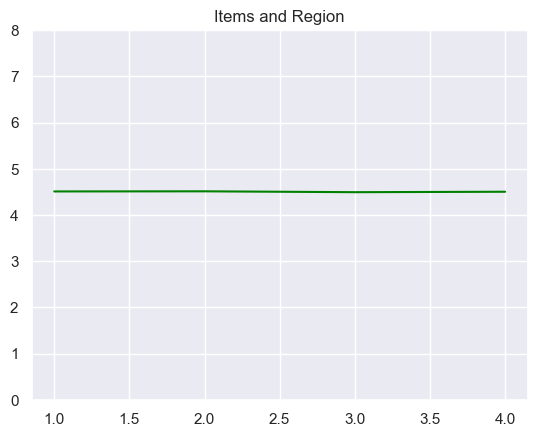

In [84]:
plt.plot(data.groupby(['region'])['items'].mean(), color= "green") # finding the mean of items per region
plt.ylim(0,8)
plt.title('Items and Region')  
plt.show()

Conclusion:

As we can see in this chart, the difference between the mean value in the number of items per region is almost irrelevant

In other words, there is not a relationship between items bought and region.

In [85]:
data.loc[0,['region','items']]

region   2.00
items    4.00
Name: 0, dtype: float64

Here we can say that a particular costumer in the region of South has bought 4 items.

In [86]:
data.loc[:,['region','items']]

,region,items
0,2,4
1,2,2
2,4,3
3,3,3
4,1,4
...,...,...
79995,1,3
79996,3,7
79997,2,1
79998,1,4


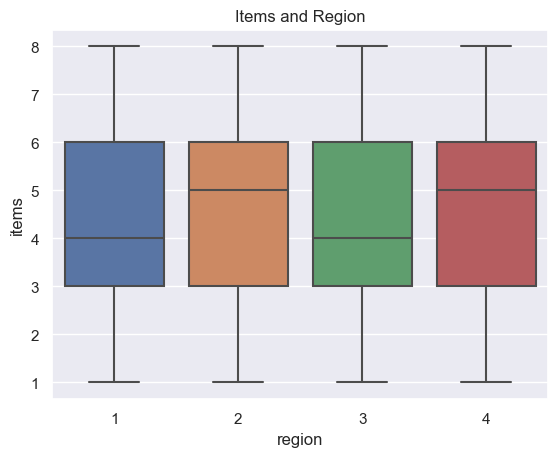

In [87]:
import seaborn as sns
sns.boxplot(data=data, x='region', y='items')
plt.title('Items and Region') 
plt.show()

The number of items is, generally speaking, like we have seen in both charts before, not a big difference between regions.

In later parts of the study, we will try to verify and prove this fact.

### Analysing online and in-store purchases


In [88]:
 data.groupby('in-store')['amount'].mean() 

in-store
0   897.57
1   774.27
Name: amount, dtype: float64

Online purchases are higher in average

In [89]:
 import matplotlib.pyplot as plt 

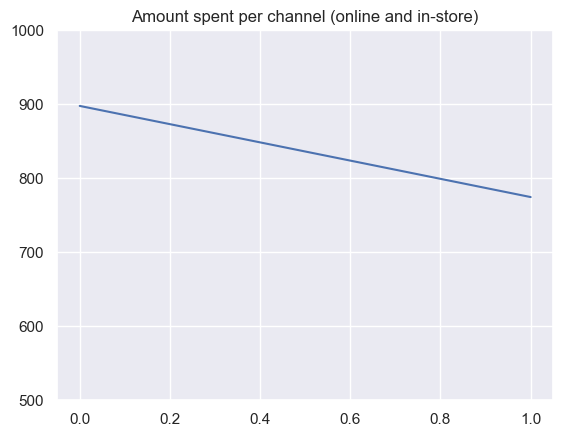

In [90]:
plt.plot(data.groupby(['in-store'])['amount'].mean())
plt.ylim(500,1000)
plt.title('Amount spent per channel (online and in-store)') 
plt.show()

In the plot below we can see that the plot tends to be downtrend, what we can say and see from this plot is that the most of transactions are done online so we can easily say that we have a massive amount of costumers that use online store instead of offline.

#### Analysing variables items and amount spent. 
Second objective: Is there a relationship between the number of items purchased and amount spent?

In [91]:
data.groupby('items')['amount'].mean()

items
1   825.39
2   847.14
3   836.69
4   829.60
5   834.30
6   835.30
7   830.14
8   851.27
Name: amount, dtype: float64

Conclusion: As far as we can see the items bought have a close average with some exceptions in very small values.

In [92]:
### Below are shown some plots in order to see if there is any relation between variables 

In [93]:
 import matplotlib.pyplot as plt 

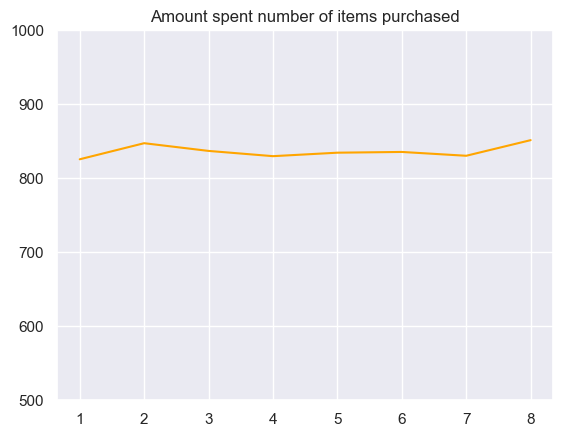

In [94]:
plt.plot(data.groupby(['items'])['amount'].mean(), color= "orange")
plt.ylim(500,1000)
plt.title('Amount spent number of items purchased') 
plt.show()

In this plot, based on the pattern, we can not give conclusions.

In [95]:
online_data = data.loc[data['in-store'] == 0,:]
offline_data = data.loc[data['in-store'] == 1,:]


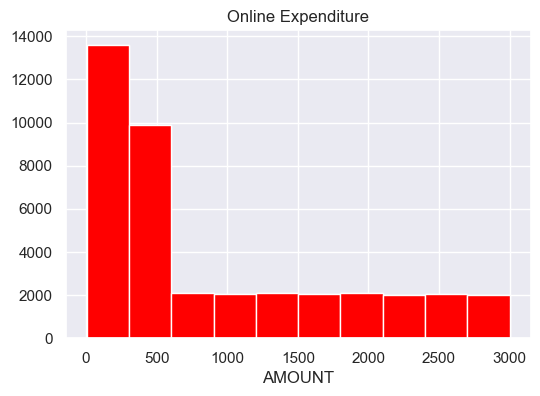

In [96]:
data.head() 
fig, ax = plt.subplots(figsize = (6,4))
plt.hist(online_data['amount'])  
# we are setting the x axis name:
ax.set_xlabel("AMOUNT") 

ax.hist(online_data['amount'], density=True) 
ax.hist(online_data['amount'], color="red") 
plt.title('Online Expenditure') 
plt.show() 

Conclusion: From the histogram above, the interval of amount axis [0-250] has the highest frequency, therefore a higher distribution. 

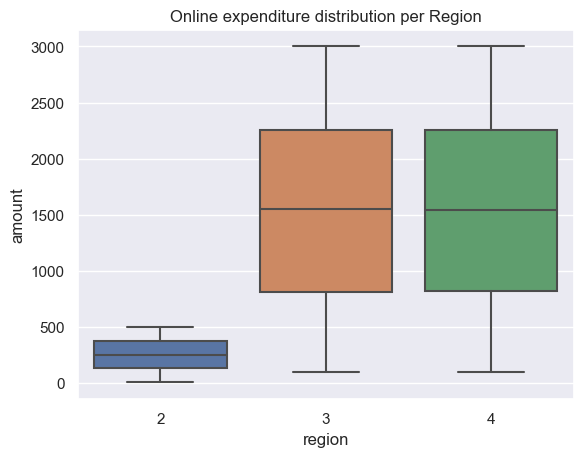

In [97]:
import seaborn as sns
sns.boxplot(data=online_data, x='region', y='amount')
plt.title('Online expenditure distribution per Region') 
plt.show() 

In this boxplot we can observe that there are **not online sales** in the **region of north, region(1)**, but if we compare the **region(3)** with the **region (4)** there is not a distinction between the means of theirs so we can not define an accurate conclusion regarding the transactions that the costumers have done in those specific regions yet. 

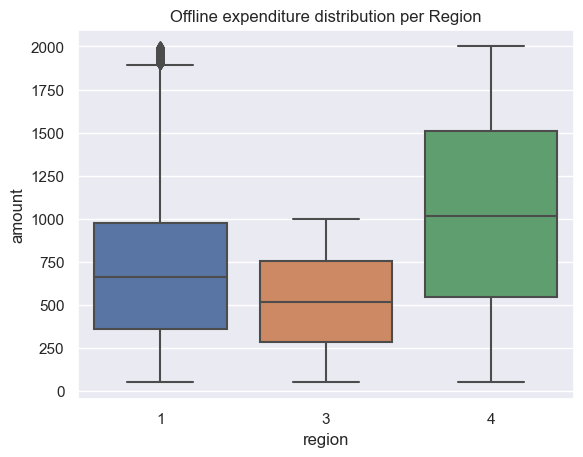

In [98]:
import seaborn as sns
sns.boxplot(data=offline_data, x='region', y='amount')
plt.title('Offline expenditure distribution per Region') 
plt.show() 

Conclusions:

 -**No sales offline in region 2,(south)**,but we can make a distinction between the regions 1,3, and 4. -**The higher mean is located on the third box-** which probably means that costumers **spent more per transcation in the region 4 of west, offline.**

### Age expenditure(analyzing age variable)

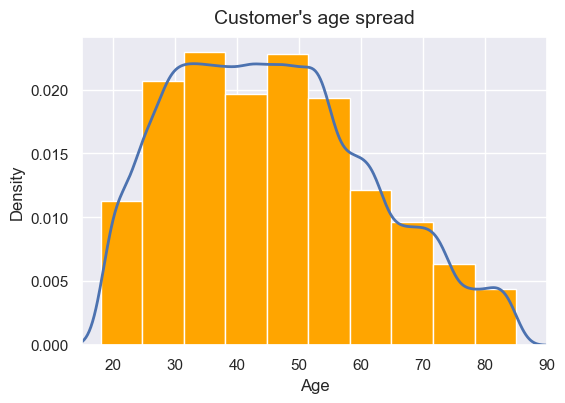

In [99]:
 data.head() 
fig, ax = plt.subplots(figsize = (6,4))

# creating the plot (histogram) for age
data['age'].plot(kind = "hist", density=True, color='orange')
plt.style.use("bmh")

# making a density line
data['age'].plot(kind = "kde")

# we are setting the x axis name:
ax.set_xlabel("Age")

#setting the title
ax.set_title("Customer's age spread", size = 14, pad = 10)

ax.set_xlim(15, 90)

plt.show() 

Conclusion: In the chart above, we display the age group of all the costumers using the histogram. By looking at the histogram, we can easily tell that, most of their ages lay between 32 to 52 years which have the highest distributions.  
Based on the highest distribution we can say that our customer audience are generally speaking middle age mostly.

In [100]:
 import numpy as np
import matplotlib.pyplot as plt
    
 

In [101]:
region_north = data.loc[data['region'] == 1,:]
region_south = data.loc[data['region'] == 2,:]
region_east = data.loc[data['region'] == 3,:]
region_west = data.loc[data['region'] == 4,:]

In [102]:
# online_data
region_north_online = online_data.loc[online_data['region'] == 1,:]
region_south_online = online_data.loc[online_data['region'] == 2,:]
region_east_online = online_data.loc[online_data['region'] == 3,:]
region_west_online = online_data.loc[online_data['region'] == 4,:]
# offline_data
region_north_offline = offline_data.loc[offline_data['region'] == 1,:]
region_south_offline = offline_data.loc[offline_data['region'] == 2,:]
region_east_offline = offline_data.loc[offline_data['region'] == 3,:]
region_west_offline = offline_data.loc[offline_data['region'] == 4,:]

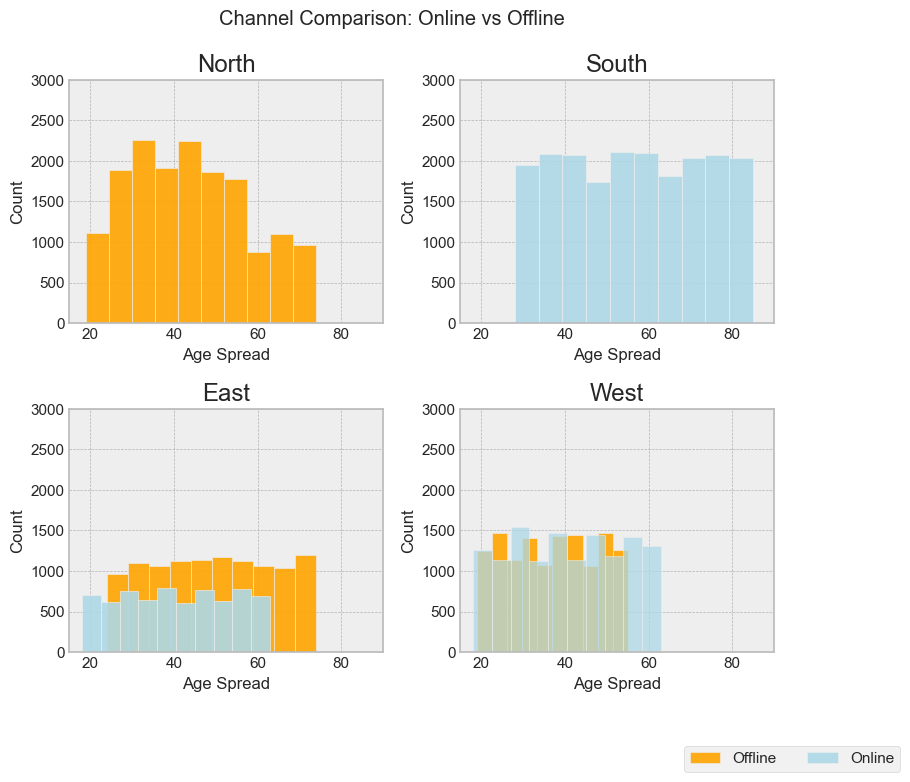

In [103]:

fig, ax = plt.subplots(2,2, figsize=(8, 7)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

plt.title('Channel Comparison between Region: Online & Offline') 
# Chart for Region North
ax[0,0].hist(region_north_offline['age'], color = "orange", alpha= 0.9)
ax[0,0].hist(region_north_online['age'], color= "lightblue", alpha = 0.9)
ax[0,0].set(xlabel='Age Spread', ylabel='Count',
       title='North', ylim=(0,3000), xlim= (15,90))
 
# Chart for South Region
ax[0,1].hist(region_south_offline['age'], color = "orange", alpha= 0.9)
ax[0,1].hist(region_south_online['age'], color= "lightblue", alpha = 0.9)
ax[0,1].set(xlabel='Age Spread', ylabel='Count',
       title='South', ylim=(0,3000), xlim= (15,90))

# Chart for East Region 
ax[1,0].hist(region_east_offline['age'], color = "orange", alpha= 0.9)
ax[1,0].hist(region_east_online['age'], color= "lightblue", alpha = 0.9)
ax[1,0].set(xlabel='Age Spread', ylabel='Count',
       title='East', ylim=(0,3000), xlim= (15,90))

 
# Chart for West Region
ax[1,1].hist(region_west_offline['age'], color = "orange", alpha= 0.9)
ax[1,1].hist(region_west_online['age'], color= "lightblue", alpha = 0.75)
ax[1,1].set(xlabel='Age Spread', ylabel='Count',
       title='West', ylim=(0,3000), xlim= (15,90))


fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

labels = ['Offline', 'Online']
fig.legend(labels, loc='lower center', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)


plt.show()

**CONCLUSIONS**: 
--- 

-**NORTH REGION:** The first insight that we obtain in this chart is that there is only offline sales  in this particular region. Regarding age  ditribution of our customers in this region we have mostly middle age customers (30-47 years old). 

-**SOUTH REGION:** On the other hand, in this region we do not have offline sales, but only online ones. In this particular region there is no youngsters(young age) related to client age and mostly we have middle-age, old customers. 

-**EAST REGION:** In this region our customers tend to use both purchasing chanels. There is a young group age that only use online purchsing(19-25 years old). From (25-63 years old)  they both use  purchasing chanels. Additionally, this group age that varies from(63-76)  purchase only offline. There is a particular group age that has the highest spread(69-75), old group age that buys only  offline.  

-**WEST REGION:** This region tends to follow the same pattern with the East region. Both chanels are used by customers. 
Some different insights compared to east region is that in this particular region, the youngsters use both chanels,  and the distribution of this group age is higher in west region. There are a few youngsters that vary from 18-19 years old that buy only online, and from 20 up to 55 years old customers use both chanels. Additionally there is a specific group age that varies from 55-63 years old(elderies) that use only online.   


To summarize it all, customers spent more per transcation in the west region, based on the age distribution and chanel using, because as we can see from the chart all the group ages have higher expenditure, and the purchasing power by both chanels surpasses the east one.

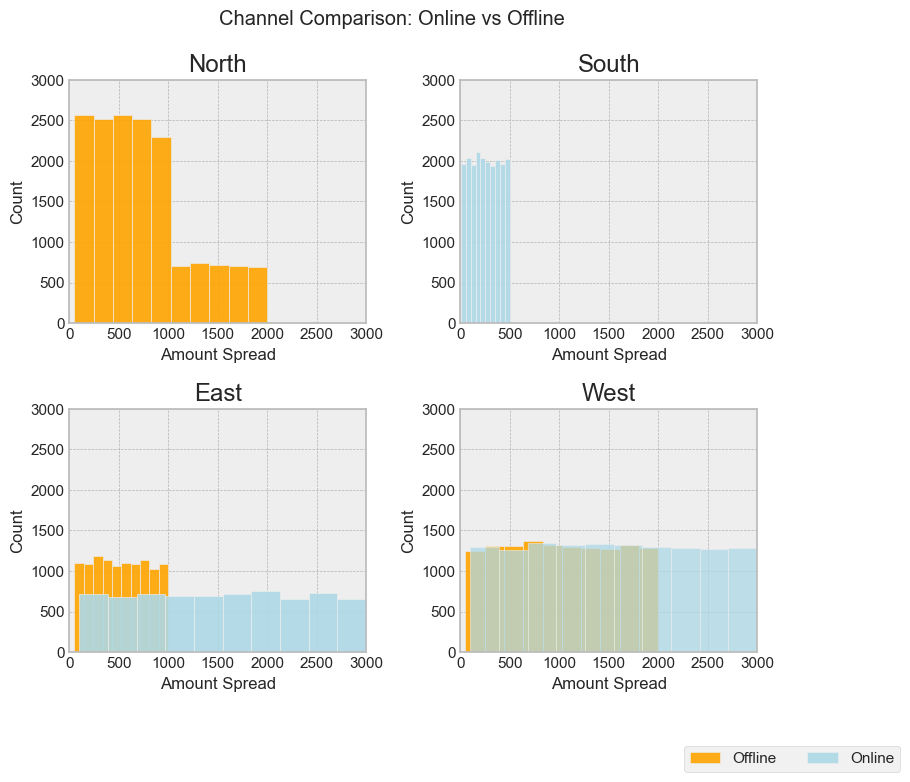

In [104]:
fig, ax = plt.subplots(2,2, figsize=(8, 7)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

plt.title('Channel Comparison between Region: Online & Offline') 
# Chart for Region North
ax[0,0].hist(region_north_offline['amount'], color = "orange", alpha= 0.9)
ax[0,0].hist(region_north_online['amount'], color= "lightblue", alpha = 0.9)
ax[0,0].set(xlabel='Amount Spread', ylabel='Count',
       title='North', ylim=(0,3000), xlim= (0,3000))
 
# Chart for South Region
ax[0,1].hist(region_south_offline['amount'], color = "orange", alpha= 0.9)
ax[0,1].hist(region_south_online['amount'], color= "lightblue", alpha = 0.9)
ax[0,1].set(xlabel='Amount Spread', ylabel='Count',
       title='South', ylim=(0,3000), xlim= (0,3000))

# Chart for East Region 
ax[1,0].hist(region_east_offline['amount'], color = "orange", alpha= 0.9)
ax[1,0].hist(region_east_online['amount'], color= "lightblue", alpha = 0.9)
ax[1,0].set(xlabel='Amount Spread', ylabel='Count',
       title='East', ylim=(0,3000), xlim= (0,3000))

 
# Chart for West Region
ax[1,1].hist(region_west_offline['amount'], color = "orange", alpha= 0.9)
ax[1,1].hist(region_west_online['amount'], color= "lightblue", alpha = 0.75)
ax[1,1].set(xlabel='Amount Spread', ylabel='Count',
       title='West', ylim=(0,3000), xlim= (0,3000))


fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

labels = ['Offline', 'Online']
fig.legend(labels, loc='lower center', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)


plt.show()

**CONCLUSIONS**:  
--- 


-**NORTH REGION:** In this particular region as we mention before there are only offline sales. Most of our customers spend aprroximately(100-650). There are also a few customers with less expenditure  that spend 1000 up to 2000. 


-**SOUTH REGION:** In this region we have only online sale and the amount spread varies from 0 up to 500 which is low so we can say that in this region the purchasing power is low compared to north region, even though customers in those regions tend to use two different chanels.  


-**EAST REGION:** Here, our customers use both chanels. 
To begin with, there is a particular group of clients who spent less than 100, and  they use only offline chanel. 
Secondly, customers who spent 100 up to 1000, using both channels, even though in this area of the chart, offline purchases have overlapped the online ones. 
Additonally, customers who spent  1000 up to 3000 they use just online purchasing. 




-**WEST REGION:** West region tends to follow the same pattern as east but for sure including some differences. 
Firstly, in this region we can find a similarity with the east one as here is the same for customers who spent less than 100, using only offline purchasing.  
Secondly, customers who spent 100 up to 2000 by using both purchasing chanels, and here the amount spread is higher compared to east so as a consuquence, customets tend to spend more in west region.  
Overall, the customers who spend 2000 up t0 3000 , using only online chanel have higher expenditure compared to the east one. 
-

---


 

In [105]:
### Creating a scatterplot for transcations and specific age to see if there is any pattern that we can obtain insights.

In [106]:
data_sorted_by_age = data.sort_values('age').sample(500)

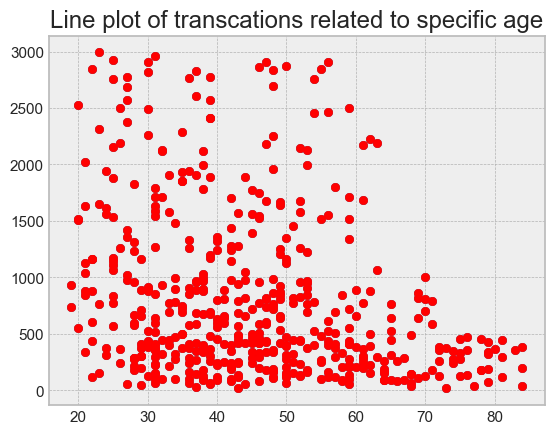

In [107]:
plt.scatter(data_sorted_by_age['age'], data_sorted_by_age['amount']) 

plt.title('Line plot of transcations related to specific age') 
plt.scatter(data_sorted_by_age['age'],data_sorted_by_age['amount'],color='red')
plt.show()

#### Conclusion is not clear as we have a dispersion of data that does not follow any pattern.

 Finding the average amount per group age.

In [108]:
average_amount_per_age_data = data.groupby(['age'])[['age', 'amount']].mean()

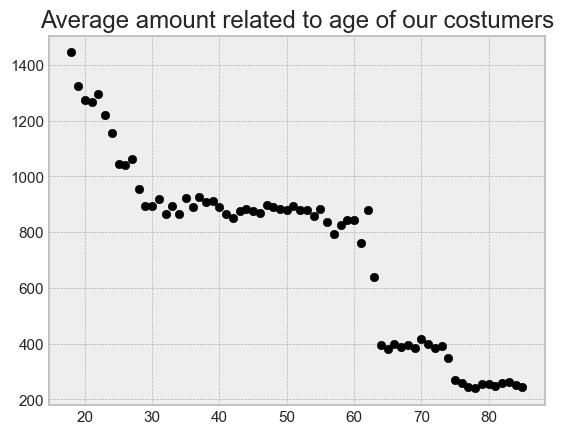

In [109]:
 plt.scatter(average_amount_per_age_data['age'], average_amount_per_age_data['amount'],color='black') 
plt.title('Average amount related to age of our costumers') 
plt.show()
 

 As far as we can see this scatterplot, the pattern tends to be downtrend with a negative correlation.The group age from 18 to 20 years old spent more per transcation compared to the middle and older ones. We can relate that based on the selected chanel , but regarding our analysis that we have done above, we mentioned that we have an average  amount of online purchases much more higher than offline purchases. And as an extended factor we can say that the youngsters can use more effectively the online purchases than older ones. Bigger the amount, less the age. The customers who spent less are the ones that varies from 75-80 years old.

 ### Creating separated scatterplots per each region

In [110]:
#online
average_amount_per_age_data_north_online = region_north_online.groupby(['age'])[['age', 'amount']].mean()
average_amount_per_age_data_south_online = region_south_online.groupby(['age'])[['age', 'amount']].mean()
average_amount_per_age_data_east_online = region_east_online.groupby(['age'])[['age', 'amount']].mean()
average_amount_per_age_data_west_online = region_west_online.groupby(['age'])[['age', 'amount']].mean()  

#offline 
average_amount_per_age_data_north_offline = region_north_offline.groupby(['age'])[['age', 'amount']].mean()
average_amount_per_age_data_south_offline = region_south_offline.groupby(['age'])[['age', 'amount']].mean()
average_amount_per_age_data_east_offline = region_east_offline.groupby(['age'])[['age', 'amount']].mean()
average_amount_per_age_data_west_offline = region_west_offline.groupby(['age'])[['age', 'amount']].mean()


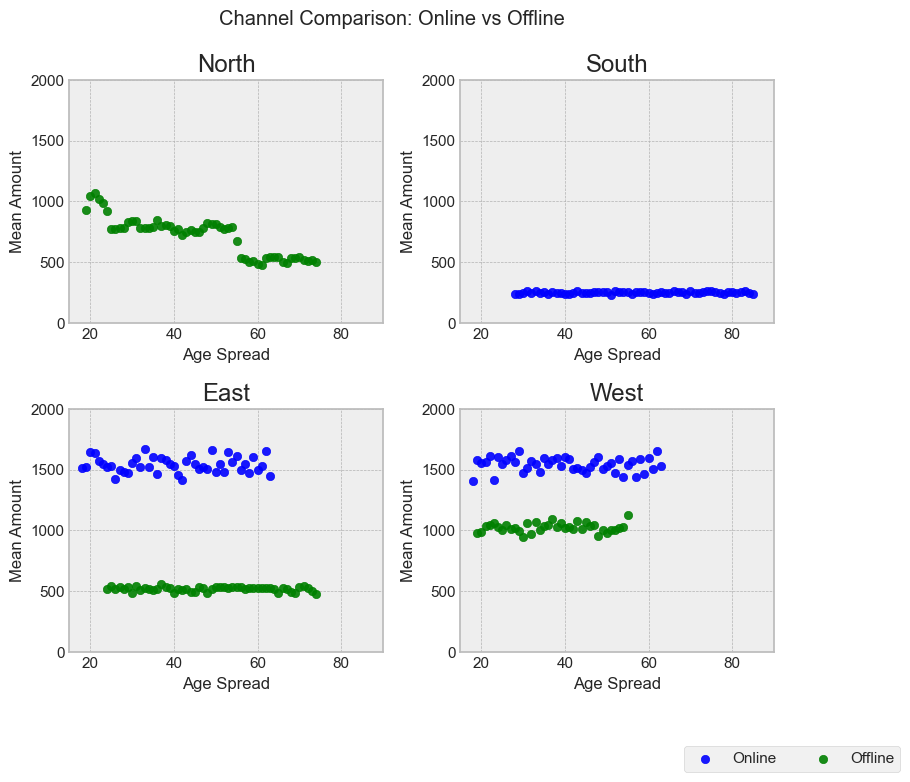

In [111]:

 fig, ax = plt.subplots(2,2, figsize=(8, 7)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

# chart for north
ax[0,0].scatter(average_amount_per_age_data_north_online['age'], average_amount_per_age_data_north_online['amount'],color='blue',alpha= 0.9) 
ax[0,0].scatter(average_amount_per_age_data_north_offline['age'], average_amount_per_age_data_north_offline['amount'],color='green',alpha= 0.9)
ax[0,0].set(xlabel='Age Spread', ylabel='Mean Amount',
       title='North',ylim=(0,2000), xlim= (15,90))
# chart for south
ax[0,1].scatter(average_amount_per_age_data_south_online['age'], average_amount_per_age_data_south_online['amount'],color='blue',alpha= 0.9) 
ax[0,1].scatter(average_amount_per_age_data_south_offline['age'], average_amount_per_age_data_south_offline['amount'],color='green',alpha= 0.9)
ax[0,1].set(xlabel='Age Spread', ylabel='Mean Amount',
       title='South',ylim=(0,2000), xlim= (15,90))
# chart for east
ax[1,0].scatter(average_amount_per_age_data_east_online['age'], average_amount_per_age_data_east_online['amount'],color='blue',alpha= 0.9) 
ax[1,0].scatter(average_amount_per_age_data_east_offline['age'], average_amount_per_age_data_east_offline['amount'],color='green',alpha= 0.9)
ax[1,0].set(xlabel='Age Spread', ylabel='Mean Amount',
       title='East',ylim=(0,2000), xlim= (15,90))
# chart for west
ax[1,1].scatter(average_amount_per_age_data_west_online['age'], average_amount_per_age_data_west_online['amount'],color='blue',alpha= 0.9) 
ax[1,1].scatter(average_amount_per_age_data_west_offline['age'], average_amount_per_age_data_west_offline['amount'],color='green',alpha= 0.9)
ax[1,1].set(xlabel='Age Spread', ylabel='Mean Amount',
       title='West',ylim=(0,2000), xlim= (15,90)) 
fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

labels = ['Online', 'Offline']
fig.legend(labels, loc='lower center', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)


plt.show()

 **CONCLUSIONS**: 
 --- 
 
-**NORTH REGION:** In this region, we have only offline sales. Based on the age spread of our clients, the youngsters(around 20 years old) spend more averagely compared to the other grop ages. The patterns tends to be downtrend, younger the customers, higher the average amount they spent.  

-**SOUTH REGION:** In this particular region, there are only online sales. Compared to North, in this region the customers of different ages spent approximately the same average amount(250), therefore, in the north region customers spent more than in south region. Also in this region we have the old customers audience(over 80 years old)  who have chosen to buy only online. 

-**EAST REGION:** Both purchasing chanels. 
Firslty, based on the pattern customers from less than 20 up to 61 years old using online chanel, surpasses the average amount compared to customers who buy only offline. In this  particular region, for customers who buy offline , regarding age spread they are moslty, more than 20 years old up to 77. 

-**WEST REGION:** BOTH PURCHASING CHANELS. 
To begin with, on contrary with east region, in this region customers who are less than 20 tend to use both channels. 
In this particular region, we have customers from less than 20 up to 58 who buy only offline and differenly from east, there are not elderly audience, and customers who purchase offline have higher average amount compared to east. 
Additionally, for customers less than 20 up tp 62 who buy only online in both regions east and west they tend to have simmilarity based on the pattern and the average amount spent is approximately the same(online chanel), but the offline sales have surpassed in west, so customers spent more in west region.


### CHANEL COMPARISON BASED ON AMOUNT SPREAD. 


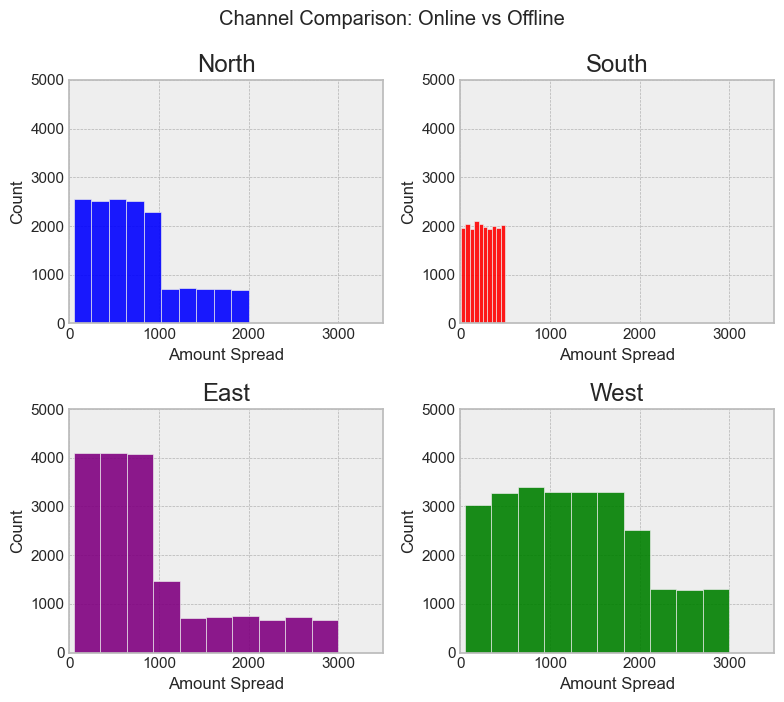

In [112]:
fig, ax = plt.subplots(2,2, figsize=(8, 7)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

plt.title('Channel Comparison between Region: Online & Offline') 
# Chart for Region North
ax[0,0].hist(region_north['amount'], color = "blue", alpha= 0.9)
ax[0,0].set(xlabel='Amount Spread', ylabel='Count',
       title='North', ylim=(0,5000), xlim= (0,3500))
 
# Chart for South Region
ax[0,1].hist(region_south['amount'], color = "red", alpha= 0.9)
ax[0,1].set(xlabel='Amount Spread', ylabel='Count',
       title='South', ylim=(0,5000), xlim= (0,3500))

# Chart for East Region 
ax[1,0].hist(region_east['amount'], color = "purple", alpha= 0.9)
ax[1,0].set(xlabel='Amount Spread', ylabel='Count',
       title='East', ylim=(0,5000), xlim= (0,3500))

 
# Chart for West Region
ax[1,1].hist(region_west['amount'], color = "green", alpha= 0.9)
ax[1,1].set(xlabel='Amount Spread', ylabel='Count',
       title='West', ylim=(0,5000), xlim= (0,3500))


fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

plt.show()

 CONCLUSIONS: 
 --- 
 
 
 - **NORTH REGION:** Based on the amount spread, in this region most of our custmers spent(100-1000). The highest amount that customers  spent in this region is nearly 2000 but there are a few customers. 
 
 
   
   - **SOUTH REGION:** As we can see, in this region the highest amount spent is 500, therefore in the north region customers spent much more per transcation. 
   
   
   
   - **EAST REGION:** In this area, people mostly spent (100-900). But there are also customers who spent more than 1000 up to 3000. 
   
   
  
   - **WEST REGION:** Here, customers mostly spent (700-900).  As same as as in the east , customers spent more than 1000 up to 3000 but there  are much more customers who spent that amount compared to the west region, so in this region  the amount spread surpasses the east or other regions.
  

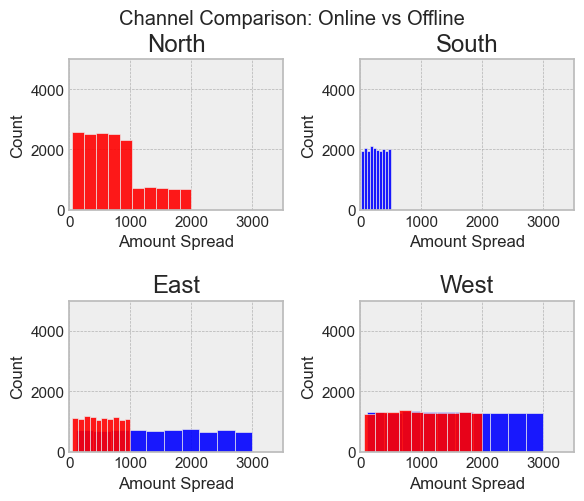

In [113]:
fig, ax = plt.subplots(2,2, figsize=(6, 5)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

plt.title('Channel Comparison between Region: Online & Offline') 
# Chart for Region North
ax[0,0].hist(region_north_online['amount'], color = "blue", alpha= 0.9)
ax[0,0].hist(region_north_offline['amount'], color = "red", alpha= 0.9)
ax[0,0].set(xlabel='Amount Spread', ylabel='Count',
       title='North', ylim=(0,5000), xlim= (0,3500))
 
# Chart for South Region
ax[0,1].hist(region_south_online['amount'], color = "blue", alpha= 0.9) 
ax[0,1].hist(region_south_offline['amount'], color = "red", alpha= 0.9)
ax[0,1].set(xlabel='Amount Spread', ylabel='Count',
       title='South', ylim=(0,5000), xlim= (0,3500))

# Chart for East Region 
ax[1,0].hist(region_east_online['amount'], color = "blue", alpha= 0.9) 
ax[1,0].hist(region_east_offline['amount'], color = "red", alpha= 0.9)
ax[1,0].set(xlabel='Amount Spread', ylabel='Count',
       title='East', ylim=(0,5000), xlim= (0,3500))

 
# Chart for West Region
ax[1,1].hist(region_west_online['amount'], color = "blue", alpha= 0.9) 
ax[1,1].hist(region_west_offline['amount'], color = "red", alpha= 0.9)
ax[1,1].set(xlabel='Amount Spread', ylabel='Count',
       title='West', ylim=(0,5000), xlim= (0,3500))


fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

plt.show()

**Conclusions:** 
--- 



**Transaction has a great dependence on the Region they were made in.**

-**NORTH REGION:** In this region we have  has only offline sales, however, their sales distribution is like East region, the patterns look similar. North region has offline sales in the Interval [0-1000]. From[1000-2000] the pattern is a downtrend , due to some ítems that customers can buy only online.  
 
-**SOUTH REGION:** In this particular region, we have only online sales, and most of our customers spent less than 600, so generally speaking this region, customers spent less compared to other regions.

 -**EAST REGION:**  has online and offline sales. The biggest distribution is located in the [0-1000],where customers use both chanels for purchasing, but offline purchases have surpassed online sales in this specific area of the chart where the values with the biggest distribution are displayed. Additionally, the charts follows a downtrend due to the specific online sales. 

-**WEST REGION:** Customers, in this region  spent more per transaction. From (500-2000), customers use both chanels, and (2000 up to 3000) customers use online channel as they are some products that you can buy only online. 


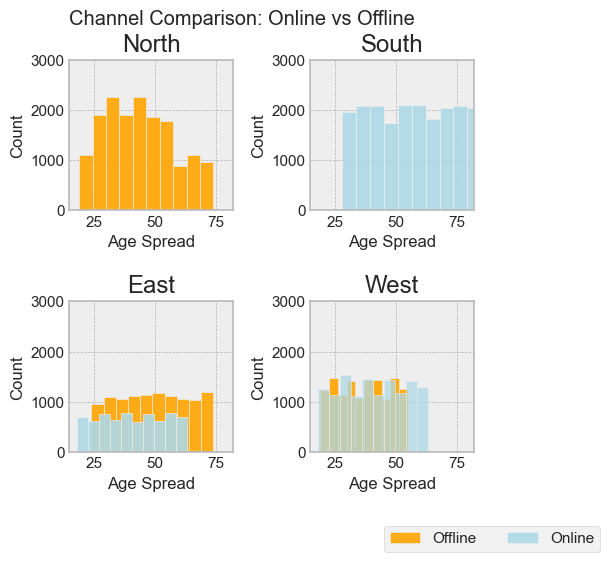

In [114]:

fig, ax = plt.subplots(2,2, figsize=(5, 5)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

plt.title('Channel Comparison between Region: Online & Offline') 
# Chart for Region North
ax[0,0].hist(region_north_offline['age'], color = "orange", alpha= 0.9)
ax[0,0].hist(region_north_online['age'], color= "lightblue", alpha = 0.9)
ax[0,0].set(xlabel='Age Spread', ylabel='Count',
       title='North', ylim=(0,3000), xlim= (15, 82))
 
# Chart for South Region
ax[0,1].hist(region_south_offline['age'], color = "orange", alpha= 0.9)
ax[0,1].hist(region_south_online['age'], color= "lightblue", alpha = 0.9)
ax[0,1].set(xlabel='Age Spread', ylabel='Count',
       title='South', ylim=(0,3000), xlim= (15,82))

# Chart for East Region 
ax[1,0].hist(region_east_offline['age'], color = "orange", alpha= 0.9)
ax[1,0].hist(region_east_online['age'], color= "lightblue", alpha = 0.9)
ax[1,0].set(xlabel='Age Spread', ylabel='Count',
       title='East', ylim=(0,3000), xlim= (15,82,))

 
# Chart for West Region
ax[1,1].hist(region_west_offline['age'], color = "orange", alpha= 0.9)
ax[1,1].hist(region_west_online['age'], color= "lightblue", alpha = 0.75)
ax[1,1].set(xlabel='Age Spread', ylabel='Count',
       title='West', ylim=(0,3000), xlim= (15,82))


fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

labels = ['Offline', 'Online']
fig.legend(labels, loc='lower center', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)


plt.show()

### Conclusions 
There is a  sort of reliance between the age and Chanel purchasing in regions. 

○ In region North the highest distribution is in 30-50 related to age spread and there are only offline sales. 

○ Region South, has only online sales, and the distribution of ages which is high, range from 30-85. 

○ Region East has both chanels, offline sales, surpasses online purchasing, the group age ranging from 25-72,use offline and group ages ranging from 20-63 use online.

○ Region west has both chanels, and both patterns of chanels are overlapping between them. From 20-56, customers use both chanels, and  from 20-60, only online. 



### **Analyzing how closely related different variables are.**

In [115]:
 data.corr()

,in-store,age,items,amount,region,north,south,east,west
in-store,1.00,-0.18,-0.00,-0.09,-0.13,0.40,-0.48,-0.12,-0.11
age,-0.18,1.00,0.00,-0.28,-0.24,-0.10,0.34,-0.06,-0.24
items,-0.00,0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
amount,-0.09,-0.28,0.00,1.00,0.40,0.13,-0.34,0.38,0.70
region,-0.13,-0.24,-0.00,0.40,1.00,-0.60,-0.29,0.11,0.66
north,0.40,-0.10,-0.00,0.13,-0.60,1.00,-0.19,-0.16,-0.23
south,-0.48,0.34,0.00,-0.34,-0.29,-0.19,1.00,-0.19,-0.27
east,-0.12,-0.06,-0.00,0.38,0.11,-0.16,-0.19,1.00,-0.22
west,-0.11,-0.24,0.00,0.70,0.66,-0.23,-0.27,-0.22,1.00


 **Here we will describe the relationship between variables based on the coefficients displayed.** 
 
 **To begin with, there is a negative correlation between in-store and age. As a consuquence, those variables do not have a linear relationship or there is a weak linear relationship due to the coeff value(-0.18).**  
 
 **Secondly, there is also a  weak linear relationship between in-store and region(-0.13).** 

 **Additionally, there is no linear relationship or correlation between items and other variables as the coeff value is 0.** 

 **Furthermore,  the variable amount is negatively correlated to in-store  and age, but has a moderate positive correlation with region variable as the coeff(0.4). NOTE: when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude regarding positive correlation.** 
 
 **To summarize it all, there was only a moderate reliance between amount and region.**



### CORRELATION HEATMAP

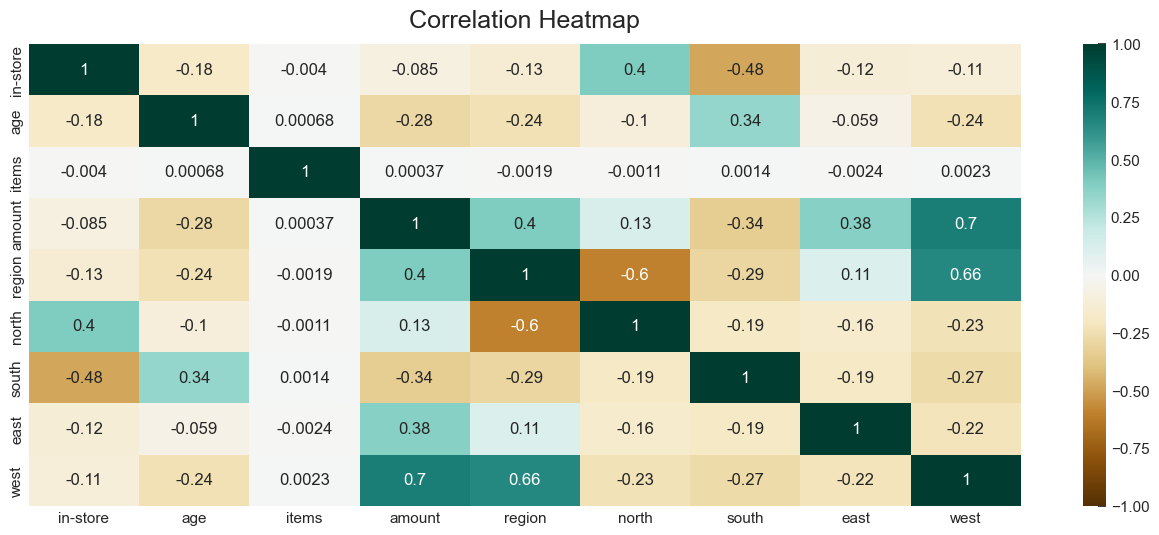

In [116]:
 plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

**CONCLUSIONS** 
--- 

-There is a weak  negative correlation between (in-store - age) and (in-store - region). In addition, the relationship between(in-store - amount)  is  much more weaker compared to the ones that we mentioned above, as the coefficient value(-0.085). On the other hand there is no linear relationship between (in-store and  items) as the coeff value is likely near to 0. 

--- 

-Secondly, there is a negative correlation between (age-amount) and  (age- region). Based on the coeff value, even here we have a weak linear reliance between those pairs of variables.  

--- 

-Item variable does not correlate or does not have any reliance to any other variable. 

--- 
-There is a moderate reliance between (amount- region) based on the coeff values(0.4), as this positive correlation between those two variables have the strongest relationship  compared to other correlations that we analysed above. 

---

####  Creating the correlation map without item variable inlcuded as we saw that items does not create any reliance to any variable 

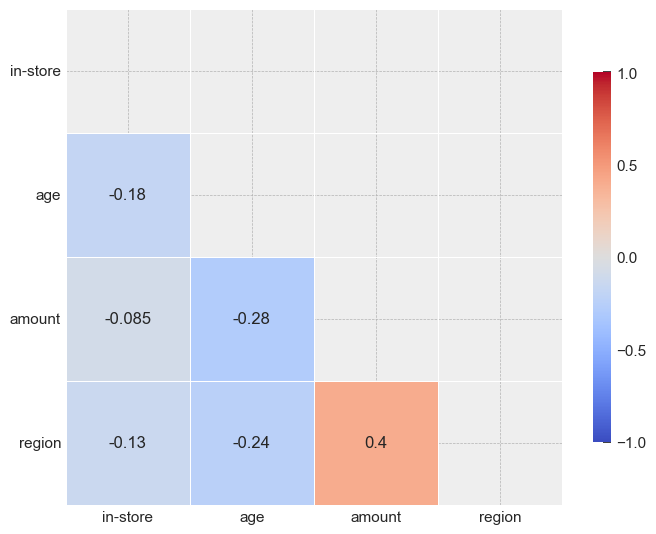

In [117]:
corr = data[['in-store', 'age', 'amount', 'region',]].corr()
## create Mask to hide the upper triangle of the matrix not to have duplicate
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(8, 12))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
## add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

 ### Conclusions 
 
 --- 
 
 1. In-store with region,(negative correlationas the (value of coeff>0) ,there is a weak linear relationship, as we saw that in different regions customers spent more or less per transcation.(I.e, in the region north we have only offline sales and customers spent more than in south that we have only online sales). So there is a little reliance between in-store and region.  
 
 --- 
 
 2. In-store with amount, those variables are said not to have a linear relationship or a very weak relationship as the coeff value near -0.1 and as the actual value of coeff between those two variables is -0.085.  
 
 --- 
 
 3.In- store with age, there is a weak linear relationship, as the value of coeff is -0.18. So there is a very weak reliance in this pair of variables. 
 
 --- 
 
 4. The variable age can somehow create a stronger relationship with region and amount( negative correlations) compared to the one aboves. For instance,there is a sort of reliance between age and amount because we saw above that in some specific regions: older the customer, less they spent, or the opposite. Additonally regarding age- region, for example, in South region there are customers over 75 years old, so if a customers is in that age or more, i assure tha this customers comes from South.
 
 --- 
 
 5. Amount and region have a good, moderate relationship and a positive correlation as the value of coeff>0). so the transcations made by customers have a reliance on the region they were made in.
 
 

## In-Depth Analysis: Machine Learning: Train/Test Split Method

In [118]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

### Before importing the module, i would like to explain what a module is.Simply, a module is a file consisting of Python code. A module can define functions, classes and variables. A module can also include runnable code.

In [119]:
# importing the modules 
from sklearn.tree import DecisionTreeClassifier

In [120]:
#  Importing the data  
data = pd.read_csv('Demographic_Data.csv')
data.head()



,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,"1,525.70",4
3,1,46,3,715.25,3
4,1,33,4,"1,937.50",1


#### Let s examine the structure of our data 

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


###  Lets select the features, the dependent variable and divide the data into training and testing sets:

In [122]:
#  Select the features 
#features
ind_var = data[['in-store', 'age', 'amount']]
print('Summary of feature sample')
ind_var.head()

Summary of feature sample


,in-store,age,amount
0,0,37,281.03
1,0,35,219.51
2,1,45,"1,525.70"
3,1,46,715.25
4,1,33,"1,937.50"


In [123]:
# Selecting the Dependent Variable or what we want to study or predict 
#dependent variable
dep_var = data['region']

 ### Lets define the model. 

####  We have already split our data into ind_var and dep_var components in the previous task, lets now use the data and the train_test_split function of SciKit-Learn to create the necessary training and testing data for our model as follows: 



In [124]:
 #Train/Test Split 
from sklearn.model_selection import train_test_split
ind_var_train, ind_var_test, dep_var_train, dep_var_test = train_test_split(ind_var, dep_var, 
                                                                            test_size = .20, random_state = 123)

#### Next, we'll instantiate (bring in a copy) the algorithm just as we did previously, and we'll fit or apply the algorithm to our training sets to build the model as follows:

In [125]:
#Modeling (Classification)
algo = DecisionTreeClassifier()

# LET'S TRAIN THE MODEL
model = algo.fit(ind_var_train, dep_var_train)

#### Now that we  have a fully trained model, you must use it on the testing set to make predictions before it can be assessed:

In [126]:
# Predictions
preds = model.predict(ind_var_test)

### Finally,we can print out the classification report using the predictions we just made and the ground truth or the actual values from the testing set to assess the model with a given metric as followed

In [127]:
from sklearn.metrics import classification_report 
print(classification_report(dep_var_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.42      0.41      3182
           2       0.91      0.91      0.91      3980
           3       0.38      0.37      0.37      3632
           4       0.54      0.54      0.54      5206

    accuracy                           0.57     16000
   macro avg       0.56      0.56      0.56     16000
weighted avg       0.57      0.57      0.57     16000



**Conclusion:**  
--- 


**ACCURACY — What percent of our predictions were correct?
ACCURACY — Accuracy of positive predictions.**



**1.THE DUMBEST MODEL:**  25% accuracy per each class. However, our model get's about **56%**. So, our model, even though it's far from perfect, it's way **smarter** than the dumbest model.

--- 


Hence, there is an actual relationship between region and the rest of variables. 
--- 


In reg 2 we do have the highest accuracy rate out of all the regions. The reason for this is that in Reg 2 we don't have offline sales. So if a particular transaction is made **offline**, i can 100% assure that it is not coming from that region. Same happens for amount and age. For age, region 2 is the only one that has clients **over 75 years old**. Si if a client is that old, i can assure it's coming from south. **Amount** is very much the same, I only see transacions from 0 to 500 in region 2. So if a transacion is higher than that amount, it will not come from that region.



**We'll be predicting age group using as ind variables: region, in-store, amount**
---

### The functionpd.cut() is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges¶

In [128]:
data['age_group'] = pd.qcut(data['age'], 
                    q = 5, 
                    labels = [1,2,3,4,5])

In [129]:
data

,in-store,age,items,amount,region,age_group
0,0,37,4,281.03,2,2
1,0,35,2,219.51,2,2
2,1,45,3,"1,525.70",4,3
3,1,46,3,715.25,3,3
4,1,33,4,"1,937.50",1,2
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,5
79996,0,59,7,"1,932.00",3,4
79997,0,54,1,414.16,2,4
79998,1,49,4,335.32,1,3


In [130]:

#  Select the features 
#features
ind_var = data[['in-store', 'region', 'amount']]
# Selecting the Dependent Variable or what we want to study or predict 
#dependent variable
dep_var = data['age_group']

 ####  We have already split our data into ind_var and dep_var components in the previous task, lets now use the data and the train_test_split function of SciKit-Learn to create the necessary training and testing data for our model as follows: 
##### Let s train the model

In [131]:
#Train/Test Split 
from sklearn.model_selection import train_test_split
ind_var_train, ind_var_test, dep_var_train, dep_var_test = train_test_split(ind_var, dep_var, 
                                                                             test_size = .20, random_state = 123)
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(ind_var_train, dep_var_train)

# Predictions
preds = model.predict(ind_var_test) 

In [132]:

from sklearn.metrics import classification_report 
print(classification_report(dep_var_test, preds))

              precision    recall  f1-score   support

           1       0.27      0.30      0.29      3387
           2       0.20      0.20      0.20      3174
           3       0.21      0.20      0.21      3264
           4       0.21      0.21      0.21      3209
           5       0.33      0.31      0.32      2966

    accuracy                           0.24     16000
   macro avg       0.25      0.25      0.24     16000
weighted avg       0.24      0.24      0.24     16000



**Conclusion:**
 

**THE DUMBEST MODEL: is 20% accuracy. However, our model get's about 24%. So, our model,  its not that far away form our dumpest model based on the value(24%)**

Hence, there is an actual  very weak relationship between age _group and the rest of variables. 
The variable age doesnt give us any specific information, to evaluate the accuracy because the pattern followed in those regions was the same, BUT if we were to say for the costumer of age 78 in which region is located, we potentially would say this costumer is located in south, on the othe hand if we were to say for the costumer less than 25, i assure that is not south but it can be either north, east or west, and if this costumer has done online purchasing i assure you thst this costumer we can find either in east or west.



In [133]:
data['in-store_group'] = pd.cut(data['in-store'], 
                           bins = 2, 
                           labels = ['online','offline'])

In [134]:
data

,in-store,age,items,amount,region,age_group,in-store_group
0,0,37,4,281.03,2,2,online
1,0,35,2,219.51,2,2,online
2,1,45,3,"1,525.70",4,3,offline
3,1,46,3,715.25,3,3,offline
4,1,33,4,"1,937.50",1,2,offline
...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,5,offline
79996,0,59,7,"1,932.00",3,4,online
79997,0,54,1,414.16,2,4,online
79998,1,49,4,335.32,1,3,offline


In [135]:
#  Select the features 
#features
ind_var = data[['age', 'region', 'amount']]
# Selecting the Dependent Variable or what we want to study or predict 
#dependent variable
dep_var = data['in-store_group']

In [136]:
#Train/Test Split 
from sklearn.model_selection import train_test_split
ind_var_train, ind_var_test, dep_var_train, dep_var_test = train_test_split(ind_var, dep_var, 
                                                                            test_size = .20, random_state = 123)
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(ind_var_train, dep_var_train)

# Predictions
preds = model.predict(ind_var_test)

In [137]:
from sklearn.metrics import classification_report 
print(classification_report(dep_var_test, preds))

              precision    recall  f1-score   support

     offline       0.85      0.85      0.85      8065
      online       0.84      0.85      0.85      7935

    accuracy                           0.85     16000
   macro avg       0.85      0.85      0.85     16000
weighted avg       0.85      0.85      0.85     16000



**Conclusion:** 
--- 

Namely, 85% of our data is correctly classified, cause our dump model is 50% and the accuracy is 85% which performs much more smarter than our dump model.It looks our model is good, but it’s important to always take other performance measures into consideration to make justifiable evaluation! Hence, there is a relation between in-store group and other variables. 
as far as we can see both online and offline have high accuracy of 85, it happens because in some of regions we have specific channel, in north there were just offline sales and in south just online ones.So if we pick up a costumer around 22 years old and he buys only offline i assure that this client you can find just in north region. 
The same thing happens with region of south, i.e,  if you were to choose a costumer that is purchasing online and this costumer is around 78 , i can assure you tha you can find this client in south region. 

 ### Let s discretize Amount and use it as the dependent variable.


In [138]:
data['amount_group'] = pd.qcut(data['amount'], 
                           q = 5, 
                           labels = ['A - low','B - medium','C - high', 'D - highest', "E - themosthighest"])

In [139]:
data['amount_group'].value_counts().sort_values()

E - themosthighest    15998
C - high              15999
A - low               16000
B - medium            16001
D - highest           16002
Name: amount_group, dtype: int64

#####  We'll be predicting amount group using as ind variables: region, in-store, age

In [140]:
lower_amounts = data.loc[data['amount_group'] == 'B - medium']

lower_1 = lower_amounts.loc[lower_amounts['region'] == 1]
lower_2 = lower_amounts.loc[lower_amounts['region'] == 2]
lower_3 = lower_amounts.loc[lower_amounts['region'] == 3]
lower_4 = lower_amounts.loc[lower_amounts['region'] == 4] 

lower_1_online = lower_1.loc[lower_1['in-store'] == 0]
lower_1_offline = lower_1.loc[lower_1['in-store'] == 1]

lower_2_online = lower_2.loc[lower_2['in-store'] == 0]
lower_2_offline = lower_2.loc[lower_2['in-store'] == 1]

lower_3_online = lower_3.loc[lower_3['in-store'] == 0]
lower_3_offline = lower_3.loc[lower_3['in-store'] == 1]

lower_4_online = lower_4.loc[lower_4['in-store'] == 0]
lower_4_offline = lower_4.loc[lower_4['in-store'] == 1]

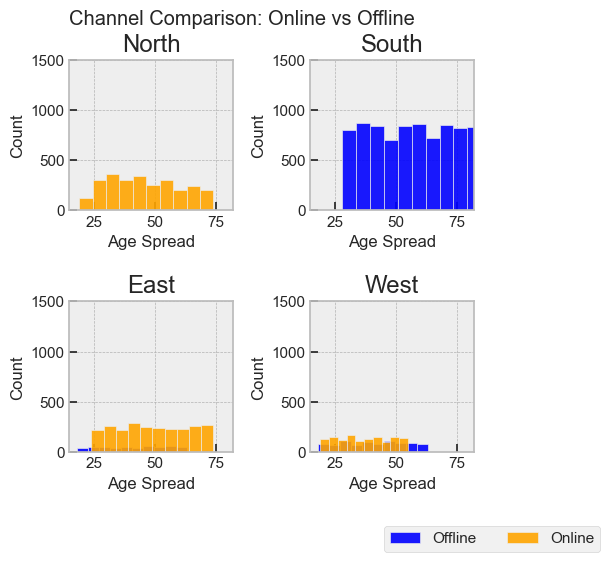

In [141]:

fig, ax = plt.subplots(2,2, figsize=(5, 5)) 
st = fig.suptitle("Channel Comparison: Online vs Offline", fontsize="large")

plt.title('Channel Comparison between Region: Online & Offline') 
# Chart for Region North
ax[0,0].hist(lower_1_online['age'], color = "blue", alpha= 0.9)
ax[0,0].hist(lower_1_offline['age'], color = "orange", alpha= 0.9)
ax[0,0].set(xlabel='Age Spread', ylabel='Count',
       title='North', ylim=(0,1500), xlim= (15, 82))
 
# Chart for South Region
ax[0,1].hist(lower_2_online['age'], color = "blue", alpha= 0.9)
ax[0,1].hist(lower_2_offline['age'], color = "orange", alpha= 0.9)
ax[0,1].set(xlabel='Age Spread', ylabel='Count',
       title='South', ylim=(0,1500), xlim= (15,82))

# Chart for East Region 
ax[1,0].hist(lower_3_online['age'], color = "blue", alpha= 0.9)
ax[1,0].hist(lower_3_offline['age'], color = "orange", alpha= 0.9)
ax[1,0].set(xlabel='Age Spread', ylabel='Count',
       title='East', ylim=(0,1500), xlim= (15,82,))

 
# Chart for West Region
ax[1,1].hist(lower_4_online['age'], color = "blue", alpha= 0.9)
ax[1,1].hist(lower_4_offline['age'], color = "orange", alpha= 0.9)
ax[1,1].set(xlabel='Age Spread', ylabel='Count',
       title='West', ylim=(0,1500), xlim= (15,82))


fig.tight_layout()
st.set_y(1)
fig.subplots_adjust(top=0.9)

labels = ['Offline', 'Online']
fig.legend(labels, loc='lower center', bbox_to_anchor=(1,-0.1), ncol=len(labels), bbox_transform=fig.transFigure)


plt.show()

In [142]:
data[data['amount_group'] == 'B - medium']['amount'].max()

438.03

In [143]:
data[data['amount_group'] == 'B - medium']['amount'].min()

234.13

In [144]:
data[data['amount_group'] == 'C - high']['amount'].max()

789.3

In [145]:
data[data['amount_group'] == 'C - high']['amount'].min()

438.04

In [146]:
#  Select the features 
#features
ind_var = data[['in-store', 'region', 'age']]
# Selecting the Dependent Variable or what we want to study or predict 
#dependent variable
dep_var = data['amount_group']

####  We have already split our data into ind_var and dep_var components in the previous task, lets now use the data and the train_test_split function of SciKit-Learn to create the necessary training and testing data for our model as follows: 


In [147]:
#Train/Test Split 
from sklearn.model_selection import train_test_split
ind_var_train, ind_var_test, dep_var_train, dep_var_test = train_test_split(ind_var, dep_var, 
                                                                            test_size = .20, random_state = 123)
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(ind_var_train, dep_var_train)

# Predictions
preds = model.predict(ind_var_test)

In [148]:
from sklearn.metrics import classification_report 
print(classification_report(dep_var_test, preds))

                    precision    recall  f1-score   support

           A - low       0.47      0.50      0.49      3267
        B - medium       0.40      0.07      0.12      3070
          C - high       0.35      0.40      0.37      3203
       D - highest       0.33      0.45      0.38      3230
E - themosthighest       0.53      0.66      0.59      3230

          accuracy                           0.42     16000
         macro avg       0.42      0.42      0.39     16000
      weighted avg       0.42      0.42      0.39     16000



Conclusion:

 - We have higher accuracy the higher the expenditure is. Why? Because the only region where we  encounter these cases are west and east
 - Medium.We have a medium expenditure, because in the region of North, except, the offline sales, there are some specific online orders compared to south.
 - Low? Region of South has a low expenditure because there are just online sales and the average amount spent is lower compared to other regions. 
 Overall, our dumpest model is around 33%, but our accuracy is 63% so we can say, that our model performs much more smarter than  dump model.
 
 

In [149]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, ind_var , dep_var, cv=3)

array([0.41268234, 0.41211985, 0.40699767])

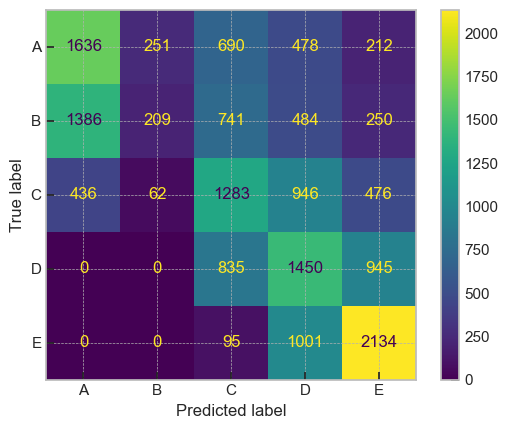

In [150]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(dep_var_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["A", "B", "C", "D", "E"])

cm_display.plot()
plt.show()

**CONCLUSIONS:** 
--- 

**1.** In the above figure, A represents low amounts, the diagonal elements represent the total correct values predicted per class. Eg: 1636 values have been correctly predicted as belonging to class A out of 3267 values. (But notice how we don’t come to know that the total class size for label A is 3267).  

--- 

**2.** The lighter the color, the greater the number.. as we can see from the color-bar on the side. So naturally we would assume that — lighter colours on the diagonal elements and darker on all others mean our model is performing well and vice-versa. (However, this is not true, as we shall see from the normalized matrix.)

--- 
**3.** The diagonal elements for class C and class D are nearly the same green. So we also assume that these two classes perform equally badly.

--- 

**4.** A lighter colour for diagonal element (E,E) implies our model performs really well for class E. 

--- 






### Lets create the normalized version of the same heat map .
**To get the normalized version, we divide each row element by the sum of the entire row. Since each row represents the total number of actual values for each class label, the final normalized matrix will show us the percentage ie. out of all true labels for a particular class, what was the % prediction of each class made by our model for that specific true label.**

<Axes: >

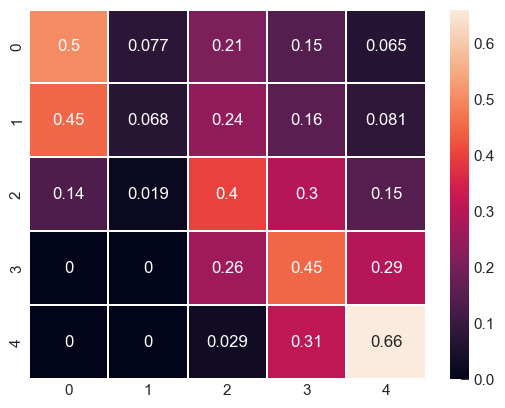

In [153]:
#Create normalized Confusion Matrix
cm_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, linewidths = 0.01)

**Conclusions:**
--- 


**First  difference. Diagonal elements for class C and class D, which we assumed were badly classified… actually went to a lighter color ie. higher number (or percentage if you will).  Both classes in this case are not classificated greatly as the value 0,4 or 0,45. The class A is greatly classified since its value is 0.66 and also class A(0.5) moderatly classified. 
 Of all the true labels for class A, our model could classify only 66% of them correctly.**
